In [1]:
import random
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import json

In [2]:
# Define constants
NUM_EMPLOYEES = 2000
NUM_MENTORS = 7
SKILLS = ["Python", "Leadership", "Time Management", "Data Analysis", "Project Management",
          "Java", "Marketing", "Public Speaking", "Teamwork", "Creative Thinking", "UI/UX Design"]
DEPARTMENTS = ["DSG",  "LSG", "MOC", "TSG", "OOC", "QCC", "EDS", "SSG", "POC", "CLV", "OM Detention & Demurrage Management", "HR"]
GOALS = ["Python", "Leadership", "Time Management", "Data Analysis", "Project Management",
          "Java", "Marketing", "Public Speaking", "Teamwork", "Creative Thinking", "UI/UX Design"]
INTERESTS = ["Sports", "Reading", "Traveling", "Cooking"]

# Function to generate a random Vietnamese phone number
def generate_phone_number():
    prefixes = ["09", "05", "03"]
    return random.choice(prefixes) + ''.join([str(random.randint(0, 9)) for _ in range(8)])

# Helper function to generate Vietnamese names
def generate_vietnamese_name():
    first_names = ["Anh", "Binh", "Cuong", "Dung", "Hanh", "Huy", "Linh", "Minh", "Ngan", "Phat", "Quang", "Tu", "Trang"]
    last_names = ["Nguyen", "Tran", "Le", "Pham", "Huynh", "Hoang", "Dang", "Bui", "Vu", "Do"]
    return f"{random.choice(last_names)} {random.choice(first_names)}"

# Define the specific mentor names
mentor_names = ["Khoa Nguyen", "Dat Tran", "Thi Huynh", "My Nguyen", "Phu Nguyen", "Chau Tran", "Phat Vo"]

# Define mentor-specific skills and departments
mentor_skills_and_departments = {
    "Khoa Nguyen": {"skills": ["Python", "Leadership", "Time Management", "Data Analysis"], "Department": "SSG"},
    "Dat Tran": {"skills": ["Java", "Teamwork", "Project Management"], "Department": "CLV"},
    "Thi Huynh": {"skills": ["Creative Thinking", "Marketing", "Public Speaking", "Teamwork"], "Department": "OM Detention & Demurrage Management"},
    "My Nguyen": {"skills": ["Project Management", "Public Speaking", "Teamwork", "Creative Thinking"], "Department": "OM Detention & Demurrage Management"},
    "Phu Nguyen": {"skills": ["UI/UX Design", "Time Management"], "Department": "OM Detention & Demurrage Management"},
    "Chau Tran": {"skills": ["Creative Thinking", "Marketing", "Public Speaking", "Teamwork"], "Department": "OM Detention & Demurrage Management"},
    "Phat Vo": {"skills": ["Java", "Teamwork", "Project Management"], "Department": "CLV"}
}

In [3]:
# Generate employee data (assuming this code block is provided by you)
employee_data = []
for i in range(NUM_EMPLOYEES):
    employee_data.append({
        "employeeID": f"{i+1:06d}",
        "name": generate_vietnamese_name(),
        "skills": random.sample(SKILLS, k=random.randint(3, 5)),
        "experience": random.randint(1, 10),
        "department": random.choice(DEPARTMENTS),
        "learningGoal": random.choice(GOALS),
        "availability": random.choice(["Flexible", "Specific hours"])
    })

employee_df = pd.DataFrame(employee_data)

# Add email columns
employee_df["email"] = [f"{name.split(' ')[-1].lower()}.{name.split(' ')[0].lower()}@cyberlogitec.com" for name in employee_df["name"]]

# Add "Interest" and "Phone Number" columns to employee_df
employee_df["interest"] = random.choices(INTERESTS, k=len(employee_df))
employee_df["phoneNumber"] = [generate_phone_number() for _ in range(len(employee_df))]

# Transform the DataFrame to match the JSON structure
employee_json_data = [
    {
        "employeeId": row["employeeID"],
        "fullName": row["name"],
        "skills": row["skills"],
        "experience": row["experience"],
        "department": row["department"],
        "learningGoal": row["learningGoal"],
        "availability": row["availability"],
        "email": row["email"],
        "interest": row["interest"],
        "phoneNumber": row["phoneNumber"]
    }
    for _, row in employee_df.iterrows()
]

# Save to JSON file
with open("employees.json", "w") as json_file:
    json.dump(employee_json_data, json_file, indent=4)

print("Employee data exported successfully!")


Employee data exported successfully!


In [4]:
employee_df.columns

Index(['employeeID', 'name', 'skills', 'experience', 'department',
       'learningGoal', 'availability', 'email', 'interest', 'phoneNumber'],
      dtype='object')

In [5]:
employee_df

,employeeID,name,skills,experience,department,learningGoal,availability,email,interest,phoneNumber
0,000001,Dang Binh,"[Project Management, Data Analysis, Python, Te...",3,OM Detention & Demurrage Management,Time Management,Specific hours,binh.dang@cyberlogitec.com,Traveling,0523662445
1,000002,Hoang Ngan,"[UI/UX Design, Public Speaking, Time Management]",2,LSG,Project Management,Specific hours,ngan.hoang@cyberlogitec.com,Reading,0936651306
2,000003,Dang Binh,"[Leadership, Teamwork, Public Speaking, Java]",8,DSG,Python,Specific hours,binh.dang@cyberlogitec.com,Cooking,0359123778
3,000004,Bui Hanh,"[UI/UX Design, Python, Java]",10,DSG,Time Management,Specific hours,hanh.bui@cyberlogitec.com,Reading,0901542337
4,000005,Pham Dung,"[Teamwork, Time Management, Project Management]",6,OM Detention & Demurrage Management,Teamwork,Flexible,dung.pham@cyberlogitec.com,Traveling,0914440075
...,...,...,...,...,...,...,...,...,...,...
1995,001996,Huynh Hanh,"[Marketing, Java, Teamwork, Python, Project Ma...",6,QCC,Marketing,Specific hours,hanh.huynh@cyberlogitec.com,Cooking,0510406335
1996,001997,Le Tu,"[Java, Public Speaking, Marketing, Creative Th...",4,DSG,Creative Thinking,Specific hours,tu.le@cyberlogitec.com,Reading,0542562121
1997,001998,Do Hanh,"[Marketing, Data Analysis, Teamwork, Leadership]",8,POC,Data Analysis,Specific hours,hanh.do@cyberlogitec.com,Traveling,0930496912
1998,001999,Do Dung,"[Project Management, Data Analysis, Teamwork, ...",6,LSG,Public Speaking,Flexible,dung.do@cyberlogitec.com,Reading,0342206568


In [6]:
# Define constants
NUM_MENTORS = 300
SKILLS = ["Python", "Leadership", "Time Management", "Data Analysis", "Project Management",
          "Java", "Marketing", "Public Speaking", "Teamwork", "Creative Thinking", "UI/UX Design"]
DEPARTMENTS = ["DSG", "LSG", "MOC", "TSG", "OOC", "QCC", "EDS", "SSG", "POC", "CLV", "OM Detention & Demurrage Management", "HR"]
INTERESTS = ["Sports", "Reading", "Traveling", "Cooking"]

# Function to generate a random Vietnamese phone number
def generate_phone_number():
    prefixes = ["09", "05", "03"]
    return random.choice(prefixes) + ''.join([str(random.randint(0, 9)) for _ in range(8)])

# Helper function to generate Vietnamese names
def generate_vietnamese_name():
    first_names = ["Anh", "Binh", "Cuong", "Dung", "Hanh", "Huy", "Linh", "Minh", "Ngan", "Phat", "Quang", "Tu", "Trang"]
    last_names = ["Nguyen", "Tran", "Le", "Pham", "Huynh", "Hoang", "Dang", "Bui", "Vu", "Do"]
    return f"{random.choice(last_names)} {random.choice(first_names)}"

# Define the specific mentor names and data
mentor_skills_and_departments = {
    "Khoa Nguyen": {"skills": ["Python", "Leadership", "Time Management", "Data Analysis"], "Department": "SSG"},
    "Dat Tran": {"skills": ["Java", "Teamwork", "Project Management"], "Department": "CLV"},
    "Thi Huynh": {"skills": ["Creative Thinking", "Marketing", "Public Speaking", "Teamwork"], "Department": "OM Detention & Demurrage Management"},
    "My Nguyen": {"skills": ["Project Management", "Public Speaking", "Teamwork", "Creative Thinking"], "Department": "OM Detention & Demurrage Management"},
    "Phu Nguyen": {"skills": ["UI/UX Design", "Time Management"], "Department": "OM Detention & Demurrage Management"},
    "Chau Tran": {"skills": ["Creative Thinking", "Marketing", "Public Speaking", "Teamwork"], "Department": "OM Detention & Demurrage Management"},
    "Phat Vo": {"skills": ["Java", "Teamwork", "Project Management"], "Department": "CLV"}
}

# Generate mentor data for the fixed mentors
mentor_data = [
    {
        "mentorID": f"M{i+1:02d}",
        "name": name,
        "skills": details["skills"],
        "experience": random.randint(10, 30),
        "department": details["Department"],
        "mentoringCapacity": random.randint(1, 5),
        "preferredSkills": random.sample(SKILLS, k=random.randint(2, 4)),
        "availability": random.choice(["Flexible", "Specific hours"]),
        "email": f"{name.split(' ')[-1].lower()}.{name.split(' ')[0].lower()}@cyberlogitec.com",
        "interest": random.choice(INTERESTS),
        "phoneNumber": generate_phone_number()
    }
    for i, (name, details) in enumerate(mentor_skills_and_departments.items())
]

# Generate additional random mentor data for the remaining mentors (293)
additional_mentors_count = NUM_MENTORS - len(mentor_skills_and_departments)

# Generate additional mentor data
for i in range(additional_mentors_count):
    full_name = generate_vietnamese_name()  # Generate the name once and assign to full_name
    mentor_data.append({
        "mentorID": f"M{i+len(mentor_data)+1:03d}",
        "name": full_name,
        "skills": random.sample(SKILLS, k=random.randint(2, 5)),
        "experience": random.randint(10, 30),
        "department": random.choice(DEPARTMENTS),
        "mentoringCapacity": random.randint(1, 5),
        "preferredSkills": random.sample(SKILLS, k=random.randint(2, 4)),
        "availability": random.choice(["Flexible", "Specific hours"]),
        "email": f"{full_name.split()[1].lower()}.{full_name.split()[0].lower()}@cyberlogitec.com",  # Use full_name for email
        "interest": random.choice(INTERESTS),
        "phoneNumber": generate_phone_number()
    })

# Convert mentor data into a DataFrame
mentor_df = pd.DataFrame(mentor_data)

# Convert lists in 'skills' and 'preferredSkills' columns to string representations
# mentor_df['skills'] = mentor_df['skills'].apply(lambda x: ', '.join(sorted(x)))
# mentor_df['preferredSkills'] = mentor_df['preferredSkills'].apply(lambda x: ', '.join(sorted(x)))

# Remove duplicate rows from mentor_df
# mentor_df = mentor_df.drop_duplicates()

# Check if any duplicates were removed
print(f"Number of rows after removing duplicates: {mentor_df.shape[0]}")

# Transform the mentor data into the desired JSON structure
mentor_json_data = mentor_df.to_dict(orient='records')

# Save mentor data to JSON file
with open("mentors.json", "w") as json_file:
    json.dump(mentor_json_data, json_file, indent=4)

print("Mentor data with 300 mentors exported successfully!")


Number of rows after removing duplicates: 300
Mentor data with 300 mentors exported successfully!


In [7]:
mentor_df

,mentorID,name,skills,experience,department,mentoringCapacity,preferredSkills,availability,email,interest,phoneNumber
0,M01,Khoa Nguyen,"[Python, Leadership, Time Management, Data Ana...",10,SSG,3,"[Data Analysis, Java]",Flexible,nguyen.khoa@cyberlogitec.com,Traveling,0311489463
1,M02,Dat Tran,"[Java, Teamwork, Project Management]",13,CLV,2,"[Teamwork, UI/UX Design, Public Speaking, Java]",Flexible,tran.dat@cyberlogitec.com,Cooking,0386421797
2,M03,Thi Huynh,"[Creative Thinking, Marketing, Public Speaking...",27,OM Detention & Demurrage Management,2,"[Leadership, Public Speaking, UI/UX Design, Te...",Specific hours,huynh.thi@cyberlogitec.com,Sports,0306626504
3,M04,My Nguyen,"[Project Management, Public Speaking, Teamwork...",22,OM Detention & Demurrage Management,1,"[Teamwork, Creative Thinking, Python, Time Man...",Flexible,nguyen.my@cyberlogitec.com,Cooking,0512710461
4,M05,Phu Nguyen,"[UI/UX Design, Time Management]",20,OM Detention & Demurrage Management,4,"[Java, Public Speaking, Marketing, Time Manage...",Flexible,nguyen.phu@cyberlogitec.com,Cooking,0534129203
...,...,...,...,...,...,...,...,...,...,...,...
295,M584,Hoang Minh,"[Python, Creative Thinking]",27,OOC,4,"[UI/UX Design, Creative Thinking, Data Analysi...",Specific hours,minh.hoang@cyberlogitec.com,Reading,0357861409
296,M586,Dang Minh,"[Creative Thinking, Teamwork, Time Management,...",25,TSG,3,"[Leadership, Teamwork, Data Analysis]",Flexible,minh.dang@cyberlogitec.com,Reading,0993301146
297,M588,Dang Quang,"[Teamwork, Python]",30,TSG,2,"[Creative Thinking, Leadership, Project Manage...",Flexible,quang.dang@cyberlogitec.com,Sports,0998621887
298,M590,Hoang Trang,"[Python, Leadership, Project Management, Creat...",25,EDS,5,"[Time Management, Marketing, UI/UX Design, Cre...",Flexible,trang.hoang@cyberlogitec.com,Sports,0942654786


In [8]:
employee_df.columns

Index(['employeeID', 'name', 'skills', 'experience', 'department',
       'learningGoal', 'availability', 'email', 'interest', 'phoneNumber'],
      dtype='object')

In [9]:
mentor_df.columns

Index(['mentorID', 'name', 'skills', 'experience', 'department',
       'mentoringCapacity', 'preferredSkills', 'availability', 'email',
       'interest', 'phoneNumber'],
      dtype='object')

# Data Preprocessing

In [10]:
# --- Data Preparation ---

# Ensure EmployeeID and MentorID are properly formatted with leading zeros
employee_df['employeeID'] = employee_df.index.map(lambda x: f"{int(x):06d}")
mentor_df['mentorID'] = mentor_df.index.map(lambda x: f"{int(x):06d}")

# Ensure EmployeeID and MentorID are unique identifiers
employee_df.set_index('employeeID', inplace=True)
mentor_df.set_index('mentorID', inplace=True)

# Convert Skills to sets for easier calculations
employee_df['skills'] = employee_df['skills'].apply(set)
mentor_df['skills'] = mentor_df['skills'].apply(set)

# Convert Skills into binary features using MultiLabelBinarizer
all_skills = list(set.union(*employee_df['skills'], *mentor_df['skills']))  # Unique list of all skills
mlb_skills = MultiLabelBinarizer(classes=all_skills)

# Binary encoding for employee and mentor skills
employee_skills_encoded = pd.DataFrame(
    mlb_skills.fit_transform(employee_df['skills']),
    index=employee_df.index,
    columns=mlb_skills.classes_
)
mentor_skills_encoded = pd.DataFrame(
    mlb_skills.transform(mentor_df['skills']),
    index=mentor_df.index,
    columns=mlb_skills.classes_
)

# Concatenate encoded skills back to the original DataFrames
employee_df = pd.concat([employee_df, employee_skills_encoded], axis=1)
mentor_df = pd.concat([mentor_df, mentor_skills_encoded], axis=1)

# Normalize numerical features
scaler = MinMaxScaler()
employee_df[['experience']] = scaler.fit_transform(employee_df[['experience']])
mentor_df[['experience', 'mentoringCapacity']] = scaler.fit_transform(
    mentor_df[['experience', 'mentoringCapacity']]
)


## Matching algorithm

In [11]:
# Generate the Cartesian product of employee and mentor indices for efficient interaction simulation
interaction_list = []
for emp_id, mentor_id in product(employee_df.index, mentor_df.index):
    employee = employee_df.loc[emp_id]
    mentor = mentor_df.loc[mentor_id]

    # Skill similarity
    employee_skills = set(employee["skills"])
    mentor_skills = set(mentor["skills"])
    skill_overlap = len(employee_skills & mentor_skills)
    total_skills = len(employee_skills | mentor_skills)
    skill_similarity = skill_overlap / total_skills if total_skills else 0

    # Interest match
    interest_match = 1 if employee["interest"] == mentor["interest"] else 0

    # Experience difference
    experience_diff = abs(employee["experience"] - mentor["experience"])

    # Availability match
    availability_match = 1 if employee["availability"] == mentor["availability"] else 0

    # LearningGoal match
    learning_goal_match = 1 if employee["learningGoal"] in mentor["skills"] or employee["learningGoal"] in mentor["preferredSkills"] else 0

    # Add interaction data
    interaction_list.append({
        "employeeID": emp_id,
        "mentorID": mentor_id,
        "employeeName": employee["name"],  # Add employee name
        "mentorName": mentor["name"],      # Add mentor name
        "skillSimilarity": skill_similarity,
        "experienceDiff": experience_diff,
        "availabilityMatch": availability_match,
        "interestMatch": interest_match,
        "learningGoalMatch": learning_goal_match  # Add LearningGoalMatch
    })

# Convert interaction list to a DataFrame
interaction_df = pd.DataFrame(interaction_list)

# --- Feature Engineering ---
interaction_df['successLabel'] = (
    (interaction_df['skillSimilarity'] > 0.5) &
    (interaction_df['interestMatch'] == 1) &
    (interaction_df['learningGoalMatch'] == 1)  # Use LearningGoalMatch
).astype(int)

In [12]:
interaction_df

,employeeID,mentorID,employeeName,mentorName,skillSimilarity,experienceDiff,availabilityMatch,interestMatch,learningGoalMatch,successLabel
0,000000,000000,Dang Binh,Khoa Nguyen,0.333333,0.222222,0,1,1,0
1,000000,000001,Dang Binh,Dat Tran,0.400000,0.072222,0,0,0,0
2,000000,000002,Dang Binh,Thi Huynh,0.142857,0.627778,1,0,0,0
3,000000,000003,Dang Binh,My Nguyen,0.333333,0.377778,0,0,1,0
4,000000,000004,Dang Binh,Phu Nguyen,0.000000,0.277778,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
599995,001999,000295,Vu Binh,Hoang Minh,0.400000,0.294444,0,0,0,0
599996,001999,000296,Vu Binh,Dang Minh,0.428571,0.194444,1,0,1,0
599997,001999,000297,Vu Binh,Dang Quang,0.400000,0.444444,1,0,1,0
599998,001999,000298,Vu Binh,Hoang Trang,0.428571,0.194444,1,0,0,0


In [13]:
# Filter the rows where SuccessLabel is 1
successful_interactions = interaction_df[interaction_df['successLabel'] == 1]

# Print the filtered DataFrame
successful_interactions


,employeeID,mentorID,employeeName,mentorName,skillSimilarity,experienceDiff,availabilityMatch,interestMatch,learningGoalMatch,successLabel
489,000001,000189,Hoang Ngan,Do Huy,0.666667,0.888889,0,1,1,1
818,000002,000218,Dang Binh,Dang Anh,0.600000,0.127778,0,1,1,1
962,000003,000062,Bui Hanh,Pham Huy,0.600000,0.050000,0,1,1,1
1373,000004,000173,Pham Dung,Le Linh,0.750000,0.055556,0,1,1,1
1451,000004,000251,Pham Dung,Nguyen Binh,1.000000,0.505556,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
599164,001997,000064,Do Hanh,Huynh Anh,0.600000,0.677778,0,1,1,1
599488,001998,000088,Do Dung,Pham Minh,0.600000,0.505556,1,1,1,1
599512,001998,000112,Do Dung,Bui Phat,0.600000,0.094444,1,1,1,1
599886,001999,000186,Vu Binh,Dang Hanh,0.666667,0.305556,1,1,1,1


In [14]:
# Ensure EmployeeID and MentorID in interaction_df are strings
interaction_df['employeeID'] = interaction_df['employeeID'].astype(str)
interaction_df['mentorID'] = interaction_df['mentorID'].astype(str)

# Ensure indices of employee_df and mentor_df are strings
employee_df.index = employee_df.index.astype(str)
mentor_df.index = mentor_df.index.astype(str)

# --- Interaction DataFrame Preparation ---
# Create SkillOverlap feature
interaction_df['skillOverlap'] = interaction_df.apply(
    lambda row: len(
        employee_df.loc[row['employeeID'], 'skills'] &
        mentor_df.loc[row['mentorID'], 'skills']
    )
    if row['employeeID'] in employee_df.index and row['mentorID'] in mentor_df.index else 0,
    axis=1
)

# Create ExperienceDiff feature
interaction_df['experienceDiff'] = interaction_df.apply(
    lambda row: abs(
        employee_df.loc[row['employeeID'], 'experience'] -
        mentor_df.loc[row['mentorID'], 'experience']
    )
    if row['employeeID'] in employee_df.index and row['mentorID'] in mentor_df.index else 0,
    axis=1
)


# Machine Learning - Supervised Learning

## Train a Supervised Model

Class distribution after oversampling:
successLabel
0    477782
1    477782
Name: count, dtype: int64
Training time: 994.1424584388733 seconds
Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119421
           1       1.00      1.00      1.00       579

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000

Confusion Matrix for Tuned Model:
[[119421      0]
 [     0    579]]
Threshold: 0.3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119421
           1       1.00      1.00      1.00       579

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000

Threshold: 0.5
              precision    recall  f1-score   support

          

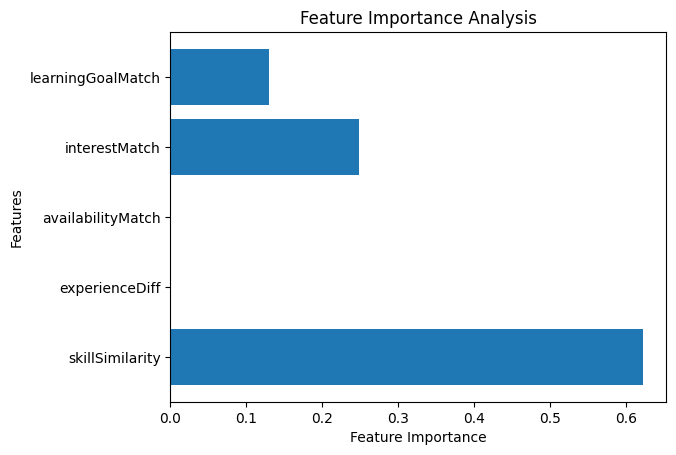

Mentor recommendations exported successfully!


<ipython-input-15-495fff2036db>:94: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recommendation_json_data = recommendations.groupby("employeeID").apply(


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler  # Faster oversampling
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import json
import time

# --- Define Features and Target ---
X = interaction_df[[
    "skillSimilarity",
    "experienceDiff",
    "availabilityMatch",
    "interestMatch",
    "learningGoalMatch"  # New feature
]]
y = interaction_df["successLabel"]

# --- Data Splitting ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Handle Class Imbalance with Faster RandomOverSampler ---
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print("Class distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

# --- Model Training with Parallelism ---
param_grid = {
    'n_estimators': [50, 100],  # Reduced number of trees
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 10]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced_subsample')
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1)  # Use 3-fold cross-validation for faster tuning

# Timing the training process
start_time = time.time()
grid_search.fit(X_resampled, y_resampled)
print(f"Training time: {time.time() - start_time} seconds")

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# --- Evaluation ---
y_pred = best_model.predict(X_test)
print("Classification Report for Tuned Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for Tuned Model:")
print(confusion_matrix(y_test, y_pred))

# --- Threshold Tuning ---
def evaluate_threshold(threshold):
    y_pred_threshold = (best_model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))

# Evaluate multiple thresholds for better insights
thresholds = [0.3, 0.5, 0.7, 0.9]
for threshold in thresholds:
    evaluate_threshold(threshold)

# --- Feature Importance Analysis ---
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

# --- Add TunedSuccessProbability to interaction_df ---
interaction_df["TunedSuccessProbability"] = best_model.predict_proba(X)[:, 1]

# --- Mentor Recommendations ---
# Rank mentors for each employee based on TunedSuccessProbability
recommendations = (
    interaction_df.sort_values(by=["employeeID", "TunedSuccessProbability"], ascending=[True, False])
    .groupby("employeeID")
    .head(3)  # Select top 3 mentors for each employee
)

# Add mentor details to recommendations
recommendations = recommendations.merge(
    mentor_df.reset_index()[["mentorID", "name", "skills", "department"]],
    on="mentorID",
    how="left"
)

# Save recommendations to JSON
recommendation_json_data = recommendations.groupby("employeeID").apply(
    lambda group: [
        {
            "mentorID": row["mentorID"],
            "name": row["name"],
            "skills": list(row["skills"]) if isinstance(row["skills"], set) else row["skills"],
            "department": row["department"],
            "TunedSuccessProbability": row["TunedSuccessProbability"]
        }
        for _, row in group.iterrows()
    ]
).to_dict()

with open("mentor_recommendations.json", "w") as json_file:
    json.dump(recommendation_json_data, json_file, indent=4)

print("Mentor recommendations exported successfully!")


# Tuning

Optimal Threshold: 0.937720646367999
Threshold: 0.937720646367999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119421
           1       1.00      1.00      1.00       579

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000



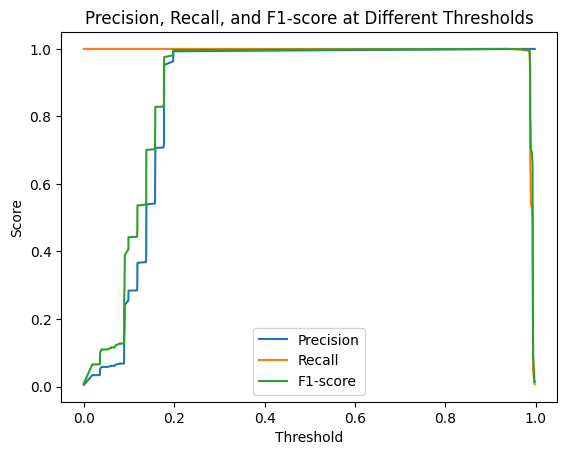

Best Threshold for F1-Score: 0.937720646367999


In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")
evaluate_threshold(optimal_threshold)

# Plot Precision-Recall curve
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score at Different Thresholds')
plt.legend()
plt.show()

# Choose the threshold that gives the best F1 score
best_threshold = thresholds[f1_scores.argmax()]
print(f"Best Threshold for F1-Score: {best_threshold}")


In [17]:
# Update predictions based on the optimal threshold
y_pred_threshold = (best_model.predict_proba(X_test)[:, 1] > 0.7729337626505416).astype(int)

# Evaluate the updated model with the optimal threshold
from sklearn.metrics import classification_report, confusion_matrix

# Print the updated classification report
print("Classification Report for Tuned Model at Threshold 0.7729:")
print(classification_report(y_test, y_pred_threshold))

# Print the updated confusion matrix
print("Confusion Matrix for Tuned Model at Threshold 0.7729:")
print(confusion_matrix(y_test, y_pred_threshold))


Classification Report for Tuned Model at Threshold 0.7729:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119421
           1       1.00      1.00      1.00       579

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000

Confusion Matrix for Tuned Model at Threshold 0.7729:
[[119421      0]
 [     0    579]]


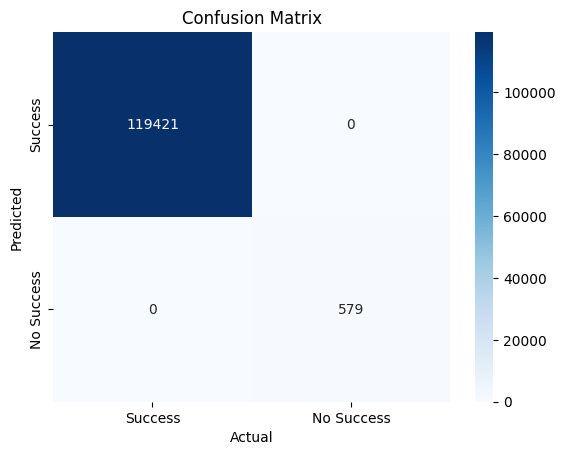

In [18]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Success', 'No Success'], yticklabels=['Success', 'No Success'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
recommendations.to_csv('mentor_recommendations.csv', index=False)

In [19]:
# Add a column for tuned success probability
interaction_df["TunedSuccessProbability"] = best_model.predict_proba(X)[:, 1]

# Rank mentors for each employee and select the top 3
recommendations = (
    interaction_df.groupby("employeeID", group_keys=False)
    .apply(lambda x: x.nlargest(3, "TunedSuccessProbability")[[
        "employeeID", "mentorID", "TunedSuccessProbability", "employeeName", "mentorName"
    ]])
)

# Convert the recommendations to a JSON format
recommendation_json = (
    recommendations.groupby("employeeID", group_keys=False)
    .apply(lambda x: x[["mentorID", "mentorName", "TunedSuccessProbability"]]
           .to_dict(orient="records"))
    .to_dict()
)

# Save the JSON file
with open("mentor_recommendations.json", "w") as json_file:
    json.dump(recommendation_json, json_file, indent=4)

print("Top 3 mentor recommendations for each employee saved to 'mentor_recommendations.json'.")


<ipython-input-19-039b386ddb6f>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, "TunedSuccessProbability")[[


Top 3 mentor recommendations for each employee saved to 'mentor_recommendations.json'.


<ipython-input-19-039b386ddb6f>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[["mentorID", "mentorName", "TunedSuccessProbability"]]


In [20]:
import joblib

# Save the trained model
joblib.dump(best_model, "tintor.pkl")

['tintor.pkl']

# Backend API in Google Colab (Flask or FastAPI)

In [ ]:
from IPython.core.display import display, HTML

# HTML content
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Mentor Matching System</title>
    <style>
        body {
            font-family: 'Roboto', sans-serif;
            background-color: #ff5c8d;
            color: white;
            text-align: center;
            margin: 0;
            padding: 0;
        }
        .container {
            height: 100vh;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
        }
        h1 {
            font-size: 3em;
            margin-bottom: 20px;
        }
        .description {
            font-size: 1.2em;
            margin-bottom: 30px;
        }
        .btn {
            background-color: #fff;
            color: #ff5c8d;
            padding: 15px 30px;
            font-size: 1.5em;
            border: none;
            border-radius: 25px;
            cursor: pointer;
            transition: background-color 0.3s ease;
        }
        .btn:hover {
            background-color: #ff4a74;
            color: white;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Welcome to Mentor Matching</h1>
        <div class="description">
            Find your perfect mentor with just a few clicks!
        </div>
        <button class="btn" onclick="startMatching()">Get Started</button>
    </div>

    <script>
        function startMatching() {
            alert("Mentor matching started!");
        }
    </script>
</body>
</html>
"""

# Display the HTML in the Colab cell
display(HTML(html_content))


In [ ]:
!pip install pyngrok
from flask import Flask, request, jsonify
from pyngrok import ngrok, conf
from google.colab import userdata
import joblib

# Load the trained model
model = joblib.load('tintor.pkl')

# Define the necessary lists for features and skills
SKILLS = ["Python", "Leadership", "Time Management", "Data Analysis", "Project Management",
          "Java", "Marketing", "Public Speaking", "Teamwork", "Creative Thinking", "UI/UX Design"]
INTERESTS = ["Sports", "Reading", "Traveling", "Cooking"]
# Assuming you have mentors data as mentor_df

# Generate mentor data with specific names, skills, and departments
mentor_data = []
for i, (name, details) in enumerate(mentor_skills_and_departments.items()):
    mentor_data.append({
        "mentorID": f"M{i+1:02d}",
        "name": name,
        "skills": details["skills"],
        "experience": random.randint(10, 30),
        "department": details["Department"],
        "mentoringCapacity": random.randint(1, 3),
        "preferredSkills": random.sample(SKILLS, k=random.randint(2, 4)),
        "availability": random.choice(["Flexible", "Specific hours"]),
        "email": f"{name.split(' ')[-1].lower()}.{name.split(' ')[0].lower()}@cyberlogitec.com"
    })

# Create the Mentor DataFrame
mentor_df = pd.DataFrame(mentor_data)

app = Flask(__name__)

conf.get_default().auth_token = userdata.get('ngrok_token')
public_url = ngrok.connect(8888).public_url
print("My tunnel = ", public_url)

@app.route('/')
def home():
    html_content = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Mentor Matching System</title>
        <style>
            body {
                font-family: 'Roboto', sans-serif;
                background-color: #ff5c8d;
                color: white;
                text-align: center;
                margin: 0;
                padding: 0;
            }
            .container {
                height: 100vh;
                display: flex;
                flex-direction: column;
                justify-content: center;
                align-items: center;
            }
            h1 {
                font-size: 3em;
                margin-bottom: 20px;
            }
            .description {
                font-size: 1.2em;
                margin-bottom: 30px;
            }
            .btn {
                background-color: #fff;
                color: #ff5c8d;
                padding: 15px 30px;
                font-size: 1.5em;
                border: none;
                border-radius: 25px;
                cursor: pointer;
                transition: background-color 0.3s ease;
            }
            .btn:hover {
                background-color: #ff4a74;
                color: white;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Welcome to Mentor Matching</h1>
            <div class="description">
                Find your perfect mentor with just a few clicks!
            </div>
            <button class="btn" onclick="startMatching()">Get Started</button>
        </div>

        <script>
            function startMatching() {
                alert("Mentor matching started!");
            }
        </script>
    </body>
    </html>
    """
    return html_content


@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Extract employee details from the request
    skills = data['skills'].split(",")  # Assuming skills are provided as comma-separated string
    experience = data['experience']
    department = data['department']
    learning_goal = data['learningGoal']
    availability = data['availability']
    interest = data['interest']
    email = data['email']
    phone = data['phoneNumber']

    # Create feature vectors and calculate matches for each mentor
    interaction_list = []
    for _, mentor in mentor_df.iterrows():
        # Calculate features like SkillSimilarity, ExperienceDiff, etc.
        employee_skills = set(skills)
        mentor_skills = set(mentor['skills'])

        # Skill similarity
        skill_overlap = len(employee_skills & mentor_skills)
        total_skills = len(employee_skills | mentor_skills)
        skill_similarity = skill_overlap / total_skills if total_skills else 0

        # Experience difference
        experience_diff = abs(experience - mentor['experience'])

        # Availability match
        availability_match = 1 if availability == mentor['availability'] else 0

        # Interest match
        interest_match = 1 if interest == mentor['interest'] else 0

        # Add to interaction list
        interaction_list.append({
            "mentorID": mentor['mentorID'],
            "mentorName": mentor['name'],  # Add mentor name
            "skillSimilarity": skill_similarity,
            "experienceDiff": experience_diff,
            "availabilityMatch": availability_match,
            "interestMatch": interest_match
        })

    # Convert interaction list to DataFrame
    interaction_df = pd.DataFrame(interaction_list)

    # Define features for prediction
    X = interaction_df[["skillSimilarity", "experienceDiff", "availabilityMatch", "interestMatch"]]

    # Get the prediction probabilities for all mentors
    probs = model.predict_proba(X)[:, 1]

    # Add the probabilities to the interaction data
    interaction_df["successProbability"] = probs

    # Sort by SuccessProbability and get the top 3 mentors
    recommendations = interaction_df.nlargest(3, "successProbability")[["mentorID", "mentorName", "successProbability"]]

    # Print the recommendations to the terminal for testing
    print("Top 3 Mentor Recommendations:")
    print(recommendations.to_json(orient="records", indent=4))  # Print JSON format

    # Return the recommendations as JSON response
    return jsonify(recommendations.to_dict(orient="records"))

if __name__ == '__main__':
    app.run(debug=False, host='0.0.0.0', port=8888, use_reloader = False)


# How to Guide

<h1>Guidance</h1>
To integrate your ReactJS application with your Flask backend for mentor matching, we can break down the process into clear steps:

1. ReactJS Front-End:

Collect employee data (such as EmployeeID, Name, Skills, Experience, etc.) from the user input.
Send this data to the Flask API endpoint via a POST request.
2. Flask Back-End:

The Flask app receives the employee data, processes it, and uses the trained model to predict potential mentors.
The Flask app will then return the prediction results to the ReactJS application.
3. ReactJS will display:

The results (top 3 potential mentors with their success probability) returned by the Flask API.

<h1><b>Steps to Test:</b></h1>
1. <b>Start your Flask server:</b> <br>Run the Flask application on your local machine or a cloud service (e.g., using ngrok if you're working with Google Colab).</br>
2. <b>Run your ReactJS app:</b>
<br>Use npm start or yarn start to launch the ReactJS app.</br>
3. <b>Input employee data in ReactJS:</b> <br>Fill out the form and click "Get Mentor Matches".</br>
4. <b>Check the Flask logs:</b> <br>You should see the prediction results being printed in the Flask server logs, and the ReactJS app will show the top 3 mentor matches.</br>
<br>By doing this, the employee data is sent to the Flask server, which processes the data, makes predictions, and sends back the results to the ReactJS app.</br>

In [ ]:
import React, { useState } from 'react';

function MentorMatching() {
  const [employeeData, setEmployeeData] = useState({
    skills: '',
    experience: '',
    department: '',
    learningGoal: '',
    availability: '',
    interest: '',
    email: '',
    phoneNumber: ''
  });

  const [recommendations, setRecommendations] = useState([]);

  const handleInputChange = (e) => {
    const { name, value } = e.target;
    setEmployeeData({ ...employeeData, [name]: value });
  };

  const handleSubmit = async (e) => {
    e.preventDefault();

    // Send a POST request to Flask backend
    const response = await fetch('http://<your-ngrok-url>/predict', {
      method: 'POST',
      headers: {
        'Content-Type': 'application/json',
      },
      body: JSON.stringify(employeeData),
    });

    const data = await response.json();

    // Handle the response and set recommendations
    setRecommendations(data);
  };

  return (
    <div>
      <h1>Mentor Matching</h1>
      <form onSubmit={handleSubmit}>
        {/* Input fields for employee data */}
        <input
          type="text"
          name="skills"
          value={employeeData.skills}
          onChange={handleInputChange}
          placeholder="Enter skills (comma-separated)"
        />
        <input
          type="number"
          name="experience"
          value={employeeData.experience}
          onChange={handleInputChange}
          placeholder="Enter experience"
        />
        <input
          type="text"
          name="department"
          value={employeeData.department}
          onChange={handleInputChange}
          placeholder="Enter department"
        />
        <input
          type="text"
          name="learningGoal"
          value={employeeData.learningGoal}
          onChange={handleInputChange}
          placeholder="Enter learning goal"
        />
        <input
          type="text"
          name="availability"
          value={employeeData.availability}
          onChange={handleInputChange}
          placeholder="Enter availability"
        />
        <input
          type="text"
          name="interest"
          value={employeeData.interest}
          onChange={handleInputChange}
          placeholder="Enter interest"
        />
        <input
          type="email"
          name="email"
          value={employeeData.email}
          onChange={handleInputChange}
          placeholder="Enter email"
        />
        <input
          type="text"
          name="phoneNumber"
          value={employeeData.phoneNumber}
          onChange={handleInputChange}
          placeholder="Enter phone number"
        />
        <button type="submit">Get Mentor Recommendations</button>
      </form>

      {/* Display the recommendations */}
      {recommendations.length > 0 && (
        <div>
          <h2>Top 3 Mentor Recommendations:</h2>
          <ul>
            {recommendations.map((mentor, index) => (
              <li key={index}>
                <strong>{mentor.mentorName}</strong> (ID: {mentor.mentorID}) - Success Probability: {mentor.successProbability}
              </li>
            ))}
          </ul>
        </div>
      )}
    </div>
  );
}

export default MentorMatching;
